In [63]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [64]:
%matplotlib inline

### 今回の話題は半教師あり学習。

<img src="スクリーンショット 2016-10-13 20.02.52.png">

### データの読み込み

In [65]:
train=pd.read_json("./train.json")
train

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [66]:
test=pd.read_json("./test.json")

### データの中身を見てみる

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [68]:
train["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

ソーティングした辞書を作成(できてない)

In [69]:
name = dict(sorted(collections.Counter(train["cuisine"]).items(),key=lambda x:x[1]))

([<matplotlib.patches.Wedge at 0x11ddfc7f0>,
  <matplotlib.text.Text at 0x11db48160>])

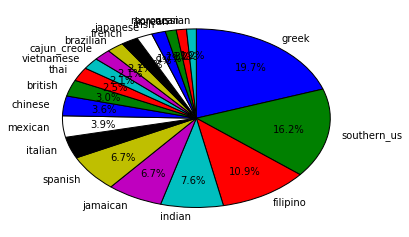

In [70]:
x = train["cuisine"].value_counts()
label = train["cuisine"].unique()
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%.1f%%",
        pctdistance=0.7)

ギリシャ料理が全体の20パーセントくらいを占めている。結構欧米の料理が上位を占めてる気がする。

In [80]:
from itertools import chain
dfr = [i for i in train["ingredients"]]
name_uniq = set(chain.from_iterable(dfr))

In [81]:
name_dict = dict(zip(name_unique,range(0,len(name_uniq))))
name_dict

{'fresh thyme': 3368,
 'bai cai': 5606,
 'huckleberries': 3369,
 'coconut vinegar': 587,
 'fresh bean': 0,
 'frozen fruit': 3370,
 'penne': 3371,
 'silver tequila': 2258,
 'watercress leaves': 3373,
 'disco empanada frozen': 1,
 'smoked fully cooked ham': 1457,
 "hellmann' or best food real mayonnais": 2,
 'liquid honey': 3,
 'lamb bouillon cube': 3376,
 'celery flakes': 4,
 'Pale Ale': 3377,
 'pork cheeks': 6,
 'sweet corn kernels': 3378,
 'soy-based liquid seasoning': 7,
 'Robert Mondavi Fume Blanc': 8,
 'ketjap': 680,
 'bhaji': 3380,
 'jackfruit': 9,
 'petits pois': 3381,
 'green onion bottoms': 3382,
 'radicchio leaves': 589,
 'corn husks': 3383,
 'eggs': 10,
 'frozen lima beans': 11,
 'porridge oats': 12,
 'long pasta': 1686,
 'cake mix or white yellow': 13,
 'celery seed': 14,
 'beef rib roast': 15,
 'cajun seasoning': 3384,
 'compressed yeast': 6621,
 '25% less sodium chicken broth': 3385,
 'Greek dressing': 3386,
 'soup': 17,
 'Everglades Seasoning': 18,
 'baby tatsoi': 19,
 'c

In [82]:
len(train["ingredients"][11])

15

In [83]:
name_list = []
for i in range(1,len(train.index)):
    arr = []
    for x in range(1,len(train["ingredients"][i])):
        arr.append(name_dict[train["ingredients"][i][x]])
    name_list.append(arr)

In [84]:
pd.DataFrame(name_list)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,3082.0,3201.0,5700.0,2462.0,739.0,10.0,750.0,6038.0,1243.0,6405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3628.0,3201.0,5609.0,2075.0,289.0,35.0,6653.0,1935.0,3392.0,1885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6405.0,5052.0,3201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2272.0,3732.0,929.0,3672.0,2624.0,1243.0,1885.0,3201.0,4684.0,6500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3231.0,1885.0,10.0,2213.0,3201.0,4226.0,1243.0,4324.0,1516.0,5151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3201.0,6556.0,3628.0,1048.0,1429.0,4990.0,4663.0,6129.0,1806.0,3504.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6705.0,1458.0,5799.0,4324.0,2282.0,4870.0,10.0,6429.0,5101.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5329.0,249.0,450.0,5208.0,4871.0,5090.0,2462.0,3201.0,2000.0,5225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3776.0,1048.0,3984.0,6502.0,4663.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1061.0,3993.0,2282.0,1048.0,500.0,3628.0,473.0,4586.0,326.0,2895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
